# Data Summarization

In this section, we will learn the basics of exploratory data analysis in SAS. We will learn how to summarize one categorical variable, one quantitative variable, and basic summaries of bivariate data. We will cover both numeric and graphical summaries. In a later section, we will return to plotting to improve the appearance of our plots for presentations.

There are a number of procedures that are available in SAS that are designed specifically to produce a variety of different descriptive statistics and to display them in meaningful reports. The four procedures in particular, of which I am thinking, are the MEANS, SUMMARY, UNIVARIATE, and FREQ procedures.

The FREQ procedure is used to summarize discrete data values, and therefore can be used to calculate summary statistics such as the percentage of people with blue eyes and the number of elm trees succumbing to Dutch elm disease.

The MEANS, SUMMARY, and UNIVARIATE procedures are used to summarize continuous numeric values, and therefore can be used to calculate statistics, such as mean height, median salary, and minimum mileage. 

We'll work mostly with the MEANS procedure. Then, since the SUMMARY and UNIVARIATE procedures have similar options and statements as the MEANS procedure, we'll spend less time on them. The greatest difference between the three procedures is that the UNIVARIATE procedure calculates a few more additional statistics not available in the MEANS and SUMMARY procedures. If you do not need to calculate the additional statistics that are available in UNIVARIATE, however, it is much more efficient to use the MEANS and SUMMARY procedures. 

All three of the procedures take the following generic form:

```    
PROC PROCNAME options; 
     statement1;
     statement2;
     etc;
RUN;
```    

where, not surprisingly, PROCNAME stands for the name of the procedure, and is therefore — either MEANS, SUMMARY, or UNIVARIATE.

For plotting, we will mainly focus on using PROC SGPLOT.

## Summarizing Quantitative Data

Throughout our investigation of the MEANS, SUMMARY, and UNIVARIATE procedures, we'll use the hemotology dataset, hem2.sas7bdat (see CANVAS for the dataset), arising from the ICDB Study. The following program tells SAS to display the contents, and print the first 15 observations, of the data set:

In [1]:
LIBNAME phc6089 '/folders/myfolders/SAS_Notes/data/';
 
PROC CONTENTS data = phc6089.hem2 position;
RUN;
 
PROC PRINT data = phc6089.hem2 (OBS = 15);
RUN;

SAS Connection established. Subprocess id is 4314



First, download and save the hematology data set to a convenient location on your computer. Then, launch the SAS program, and edit the LIBNAME statement so that it reflects the location in which you saved the data set. Finally, run the program. You may recall that the CONTENTS procedure's POSITION option tells SAS to display the contents of the data set in the order in which the variables appear in the data set. Therefore, you should see output that looks something like what is shown above.

The first two variables, subj and hosp, tell us the subject number and at what hospital the subject's data were collected. The remaining variables, wbc, rbc, hemog, ... are the blood data variables of most interest. For example, the variables wbc and rbc contain the subject's white blood cell and red blood cell counts, respectively. The really important thing to note when reviewing the output is that all of the blood data variables are continuous numeric variables, which lend themselves perfectly to a descriptive analysis using the MEANS procedure.

### The MEANS and SUMMARY Procedures

In this section, we'll learn the syntax of the simplest MEANS and SUMMARY procedures, as well as familiarize ourselves with the output they generate.

### Example

The MEANS procedure can include many statements and options for specifying the desired statistics. For the sake of simplicity, we'll start out with the most basic form of the MEANS procedure. The following program simply tells SAS to display basic summary statistics for each numeric variable in the phc6089.hem2 data set:  

In [2]:
PROC MEANS data = phc6089.hem2;
RUN;

Variable,N,Mean,Std Dev,Minimum,Maximum
subj hosp wbc rbc hemog hcrit mcv mch mchc,635 635 635 635 635 635 635 634 634,327199.50 32.7133858 7.1276850 4.4350079 13.4696063 39.4653543 89.1184252 30.4537855 34.1524290,144410.20 14.4426330 1.9019097 0.3941710 1.1097954 3.1623819 4.5190963 1.7232248 0.7562054,110027.00 11.0000000 3.0000000 3.1200000 9.9000000 29.7000000 65.0000000 22.0000000 31.6000000,520098.00 52.0000000 14.2000000 5.9500000 17.7000000 51.4000000 106.0000000 37.0000000 36.7000000


Launch and run the SAS program, and review the output to familiarize yourself with the summary statistics that the MEANS procedure calculates by default. As you can see, in its most basic form, the MEANS procedure prints N (the number of nonmissing values), the mean, the standard deviation, and the minimum and maximum values of every numeric variable in the data set.  
In most cases, you probably don't want SAS to calculate summary statistics for every numeric variable in your data set. Instead, you'll probably just want to focus on a few important variables. For our hematology data set, for example, it doesn't make much sense for SAS to calculate summary statistics for the subj and hosp variables. After all, how does it help us to know that the average subj number is 327199.5?  

### Example

The following program uses the MEANS procedure's VAR statement to restrict SAS to summarizing just the seven blood data variables in the icdb.hem2 data set:  

In [3]:
PROC MEANS data = phc6089.hem2;
   var wbc rbc hemog hcrit mcv mch mchc;
RUN;

Variable,N,Mean,Std Dev,Minimum,Maximum
wbc rbc hemog hcrit mcv mch mchc,635 635 635 635 635 634 634,7.1276850 4.4350079 13.4696063 39.4653543 89.1184252 30.4537855 34.1524290,1.9019097 0.3941710 1.1097954 3.1623819 4.5190963 1.7232248 0.7562054,3.0000000 3.1200000 9.9000000 29.7000000 65.0000000 22.0000000 31.6000000,14.2000000 5.9500000 17.7000000 51.4000000 106.0000000 37.0000000 36.7000000


Launch and run the SAS program, and review the output to convince yourself that the `subj` and `hosp` variables have been excluded from the analysis.  
The other thing you might notice about the output is that there are many more decimal places displayed than are necessary. By default, SAS uses the best. format to display values in reports created by the MEANS procedure. In a technical sense, it means that SAS chooses the format that provides the most information about the summary statistics while maintaining a default field width of 12. In a practical sense, it means that often too many decimal places are displayed.  

### Example

The following program is identical to the program in the previous example except for two things:  

1. The MEANS keyword has been replaced with the SUMMARY keyword
2. The PRINT option has been added to the PROC statement.

In [4]:
PROC SUMMARY data = phc6089.hem2 MAXDEC = 2 FW = 10 PRINT;
   var wbc rbc hemog hcrit mcv mch mchc;
RUN;

Variable,N,Mean,Std Dev,Minimum,Maximum
wbc rbc hemog hcrit mcv mch mchc,635 635 635 635 635 634 634,7.13 4.44 13.47 39.47 89.12 30.45 34.15,1.90 0.39 1.11 3.16 4.52 1.72 0.76,3.00 3.12 9.90 29.70 65.00 22.00 31.60,14.20 5.95 17.70 51.40 106.00 37.00 36.70


The MEANS and SUMMARY procedures perform the same functions except for the default setting of the PRINT option. By default, the MEANS procedure produces printed output, while the SUMMARY procedure does not. With the MEANS procedure, you have to use the NOPRINT option to suppress printing, while with the SUMMARY procedure, you have to use the PRINT option to get a printed report.  
Launch and run the SAS program, and review the output to convince yourself that there is no difference between the two reports created by the MEANS and SUMMARY procedures.  
There is actually a difference. The VAR statement in the above program tells SAS which of the (numeric) variables to summarize. If you do not include a VAR statement in the SUMMARY procedure, SAS merely gives a simple count of the number of observations in the data set. To convince yourself of this, delete the VAR statement, and re-run the SAS program. You should see output that looks something like this:  

In [5]:
PROC SUMMARY data = phc6089.hem2 MAXDEC = 2 FW = 10 PRINT;
RUN;

N Obs
635


### Specifying Statistics

The default statistics that the MEANS procedure produces — N, mean, standard deviation, minimum, and maximum — might not be the ones that you actually need. You might prefer to limit your output to just the mean and standard deviation of the values. Or you might want to compute a completely different statistic, such as the median or range of values.

In order to tell SAS to calculate summary statistics other than those calculated by default, simply place the desired statistics keywords as options in the PROC MEANS statement.

### Example

The following program tells SAS to calculate and display the sum, range and median of the red blood cell counts appearing in the phc6089.hem2 data set:  

In [6]:
PROC MEANS data=phc6089.hem2 fw=10 maxdec=2 sum range median;
    var rbc;
RUN;

Launch and run the SAS program, and review the output to convince yourself that the report is generated as described. You might want to note, in particular, that when you specify a statistic in the PROC MEANS statement, the default statistics are not produced. Incidentally, you can generate the exact same report using the SUMMARY procedure, providing you again add the PRINT option to the end of the PROC statement.  
The following keywords can be used with the MEANS and SUMMARY procedures to compute statistics:  

##### Descriptive Statistics

| Keyword | Description |
|---------|-------------|
|CLM| Two-sided confidence limit for the mean|
|CSS| Corrected sum of squares|
|CV| Coefficient of variation|
|KURT| Kurtosis|
|LCLM| One-sided confidence limit below the mean|
|MAX| Maximum value|
|MEAN| Average value|
|MIN| Minimum value|
|N| No. of observations with non-missing values|
|NMISS| No. of observations with missing values|
|RANGE| Range|
|SKEW| Skewness|
|STD| Standard deviation|
|STDERR| Standard error of the mean|
|SUM| Sum|
|SUMWGT| Sum of the Weight variable values|
|UCLM| One-sided confidence limit above the mean|
|USS| Uncorrected sum of squares|
|VAR| Variance|

##### Quantile Statistics

| Keyword | Description |
|---------|-------------|
|MEDIAN or P50| Median or 50th percentile|
|P1| 1st percentile|
|P5| 5th percentile|
|P10| 10th percentile|
|Q1 or P25| Lower quartile or 25th percentile|
|Q3 or P75| Upper quartile or 75th percentile|
|P90| 90th percentile|
|P95| 95th percentile|
|P99| 99th percentile|
|QRANGE| Difference between upper and lower quartiles: Q3-Q1|

##### Hypothesis Testing

| Keyword | Description |
|---------|-------------|
|PROBT| Probability of a greater absolute value for the t value|
|T| Student's t for testing that the population mean is 0|

### Group Processing

All of the examples we've looked at so far have involved summarizing all of the observations in the data set. In many cases, we'll instead want to tell SAS to calculate summary statistics for certain subgroups. For example, it makes more sense to calculate the average height for males and females separately rather than calculating an average height of all individuals together. In this section, we'll investigate two ways of producing summary statistics for subgroups. One approach involves using a CLASS statement, and the other involves using a BY statement. As you'll soon see, the approach you choose to use will depend most on how you'd like your final report to look.

### Example

The following program uses the VAR and CLASS statements to tell SAS to calculate the default summary statistics of the `rbc`, `wbc`, and `hcrit` variables separately for each of the nine hosp values:  

In [7]:
PROC MEANS data=phc6089.hem2 fw=10 maxdec=2;
    var rbc wbc hcrit;
    class hosp;
RUN;

hosp,N Obs,Variable,N,Mean,Std Dev,Minimum,Maximum
11,106,rbc wbc hcrit,106 106 106,4.41 7.11 39.78,0.42 1.92 3.30,3.47 3.30 32.80,5.55 13.10 48.90
21,108,rbc wbc hcrit,108 108 108,4.43 7.37 39.28,0.39 1.94 2.90,3.33 3.10 33.00,5.35 12.60 48.00
22,42,rbc wbc hcrit,42 42 42,4.40 7.37 38.80,0.43 2.15 3.09,3.12 3.90 31.00,5.12 14.20 45.30
23,6,rbc wbc hcrit,6 6 6,4.28 5.17 39.37,0.45 1.37 3.31,3.64 3.30 35.90,4.94 6.60 44.80
31,52,rbc wbc hcrit,52 52 52,4.42 7.50 39.28,0.41 1.87 3.34,3.55 4.00 33.90,5.62 13.20 47.80
41,92,rbc wbc hcrit,92 92 92,4.50 7.00 40.19,0.44 1.93 3.51,3.54 3.00 32.50,5.49 12.50 49.90
42,95,rbc wbc hcrit,95 95 95,4.40 7.01 39.14,0.33 1.79 2.66,3.63 3.30 33.90,5.95 12.00 51.40
51,65,rbc wbc hcrit,65 65 65,4.50 7.25 40.00,0.42 1.95 3.50,3.80 3.50 33.00,5.70 11.50 49.00
52,69,rbc wbc hcrit,69 69 69,4.43 6.74 38.81,0.32 1.66 2.89,3.75 3.90 29.70,5.40 10.20 45.00


First, you should note that the variables appearing in the CLASS statement need not be character variables. Here, we use the numeric variable hosp to break up the 635 observations in the phc6089.hem2 data set into nine subgroups. When CLASS variables are numeric, they should of course contain a limited number of discrete values that represent meaningful subgroups. Otherwise, you will be certain to generate an awful lot of useless output.  
Now, launch and run the SAS program, and review the output to convince yourself that the report is generated as described. As you can see, the MEANS procedure does not generate statistics for the CLASS variables. Their values are instead used only to categorize the data.  
Let's see what happens when our CLASS statement contains more than one variable.  

### Example

The following program reads some data on national parks into a temporary SAS data set called parks, and then uses the MEANS procedure's VAR and CLASS statements to tell SAS to sum the number of musems and camping facilities for each combination of the `Type` and `Region` variables:  

In [8]:
DATA parks;
     input ParkName $ 1-21 Type $ Region $ Museums Camping;
     DATALINES;
Dinosaur              NM West 2  6
Ellis Island          NM East 1  0
Everglades            NP East 5  2
Grand Canyon          NP West 5  3
Great Smoky Mountains NP East 3 10
Hawaii Volcanoes      NP West 2  2
Lava Beds             NM West 1  1
Statue of Liberty     NM East 1  0
Theodore Roosevelt    NP West 2  2
Yellowstone           NP West 9 11
Yosemite              NP West 2 13
;
RUN;
 
PROC MEANS data = parks fw = 10 maxdec = 0 sum;
   var museums camping;
   class type region;
RUN;

Type,Region,N Obs,Variable,Sum
NM,East,2,Museums Camping,2 0
,West,2,Museums Camping,3 7
NP,East,2,Museums Camping,8 12
,West,5,Museums Camping,20 31


Now, launch and run the SAS program, and review the output. You should see that, for example, SAS determined that the number of museums in National Monuments in the East is 2. The number of museums in National Monuments in the West is 3. And so on.  
It is probably actually more important here to note how SAS processed the CLASS statement. As you can see, the `Type` variable appears first and the `Region` variable appears second in the CLASS statement. For that reason, the `Type` variable appears first and the `Region` variable appears second in the output. In general, the order of the variables in the CLASS statement determines their order in the output table. To convince yourself of this, you might want to change the order of the variables as they appear in the CLASS statement, and re-run the SAS program to see what you get.  

### Example

Like the CLASS statement, the BY statement specifies variables to use for categorizing observations. The following program uses the MEANS procedure's BY statement to categorize the observations in the parks data set into four subgroups, as determined by the Type and Region variables, before calculating the sum, minimum and maximum of the museums and camping values for each of the subgroups:  

In [9]:
PROC SORT data = parks out = srtdparks;
   by type region;
RUN;
 
PROC MEANS data = srtdparks fw = 10 maxdec = 0 sum min max;
   var museums camping;
   by type region;
RUN;

Variable,Sum,Minimum,Maximum
Museums Camping,2 0,1 0,1 0
Variable,Sum,Minimum,Maximum
Museums Camping,3 7,1 1,2 6
Variable,Sum,Minimum,Maximum
Museums Camping,8 12,3 2,5 10
Variable,Sum,Minimum,Maximum
Museums Camping,20 31,2 2,9 13


You might want to just go ahead and launch and run the SAS program to see what the report looks like when you use a BY statement instead of a CLASS statement to form the subgroups. You might recall that when you use a CLASS statement, SAS generates a single large table containing all of the summary statistics. As you can see in the output here, when you instead use a BY statement, SAS generates a table for each combination of the Type and Region variables. To be more specific, SAS creates four tables here — one for `Type = NM and Region = East`, one for `Type = NP and Region = East`, one for `Type = NM and Region = West`, and one for `Type = NP and Region = West`.  
Of course, there is one thing we've not addressed so far in this code ... that's the SORT procedure. Unlike CLASS processing, BY-group processing requires that your data be sorted in the order of the variables that appear in the BY statement. If the observations in your data set are not sorted in order by the variables appearing in the BY statement, then you have to use the SORT procedure to sort your data set before using it in the MEANS procedure. Don't forget that if you don't specify an output data set using the OUT= option, then the SORT procedure overwrites your initial data set with the newly sorted observations. Here, our SORT procedure tells SAS to sort the parks data set by the `Type` and `Region` variables, and to store the sorted data set in a new data set called srtdparks.  
In closing off our discussion of group processing, we should probably discuss which approach — the CLASS statement or the BY statement — is more appropriate. My personal opinion is that it's all a matter of preference. If you prefer to see your summary statistics in one large table, then you should use the CLASS statement. If you instead prefer to see your summary statistics in a bunch of smaller tables, then you should use the BY statement. My personal opinion doesn't take into account the efficiency of your program, however. The advantage of the CLASS statement is that it is easier to use since you need not sort the data first. The advantage of the BY statement is that it can be more efficient when you are categorizing data by many variables.  

### Creating Summarized Datasets

There are many situations, when performing statistical analyses on continuous data, in which you want to create a data set whose observations contain summary statistics rather than observations containing the original raw data. For example, you might want to create a graph that compares the average weight loss of subjects at, say, ten different weight loss clinics. One way of creating such a graph is to first create a data set that contains ten observations — one for each of the clinics — and an average weight loss variable. The MEANS procedure's OUTPUT statement, in conjunction with the NOPRINT option, provides the mechanism to create such a data set rather than the standard printed output.

The NOPRINT option tells SAS to suppress all printed output. The OUTPUT statement, which tells SAS to create the output data set, in general, takes the form:

`OUTPUT OUT=dsn keyword1=name1 keyword2=name2 ....;`

where *dsn* is the name of the data set you want to create, and **keyword1** is the first statistic you want dumped to the output data set and name1 is the name you want to call the variable in the data set representing that first statistic. Similarly, **keyword2** is the second statistic you want dumped to the output data set and name2 is the name you want to call the variable in the data set representing that second statistic. And so on. When you use the OUTPUT statement without specifying any keywords, the default summary statistics N, MEAN, STD, MIN, and MAX are produced for all of the numeric variables or for all of the variables that are listed in the VAR statement.

### Example

The following program uses the MEANS procedure's OUTPUT statement (and NOPRINT option) to create a temporary data set called hospsummary that has one observation for each hospital that contains summary statistics for the hospital:  

In [12]:
PROC MEANS data=phc6089.hem2 NOPRINT;
    var rbc wbc hcrit;
    class hosp;
    output out = hospsummary
           mean = MeanRBC MeanWBC MeanHCRIT
         median = MedianRBC MedianWBC MedianHCRIT;
RUN;
  
PROC PRINT data = hospsummary;
    title 'Hospital Statistics';
RUN;

title ; *Reset title;

Obs,hosp,_TYPE_,_FREQ_,MeanRBC,MeanWBC,MeanHCRIT,MedianRBC,MedianWBC,MedianHCRIT
1,.,0,635,4.43501,7.12769,39.4654,4.410,7.0,39.30
2,11,1,106,4.41321,7.10660,39.7821,4.405,7.2,39.35
3,21,1,108,4.42991,7.36944,39.2769,4.440,7.6,39.00
4,22,1,42,4.39571,7.37071,38.8024,4.445,7.1,39.40
5,23,1,6,4.27667,5.16667,39.3667,4.235,5.4,39.10
6,31,1,52,4.42135,7.50212,39.2846,4.375,7.5,39.10
7,41,1,92,4.50207,7.00435,40.1859,4.455,6.8,40.20
8,42,1,95,4.39726,7.00632,39.1358,4.350,6.9,39.30
9,51,1,65,4.50000,7.24615,39.9969,4.500,7.1,40.00
10,52,1,69,4.42580,6.74203,38.8145,4.410,6.7,38.50


Let's first review the code. The VAR statement tells SAS the three variables — `rbc`, `wbc`, and `hcrit` — that we want summarized. The CLASS statement tells SAS that we want to categorize the observations by the value of the hosp variable. The OUT= portion of the OUTPUT statement tells SAS that we want to create a temporary data set called hospsummary. The MEAN= portion of the OUTPUT statement tells SAS to calculate the average of the rbc, wbc, and hcrit values and store the results, respectively, in three new variables called MeanRBC, MeanWBC, and MeanHCRIT. The MEDIAN= portion of the OUTPUT statement tells SAS to calculate the median of the `rbc`, `wbc`, and `hcrit` values and store the results, respectively, in three new variables called `MedianRBC`, `MedianWBC`, and `MedianHCRIT`. Note that, for each keyword, the variables must be listed in the same order as they appear in the VAR statement.  
The NOPRINT option of the PROC MEANS statement tells SAS to suppress printing of the summary statistics. We must use the PRINT procedure then to tell SAS to print contents of the hospsummary data set. Because the PROC PRINT statement contains no DATA= option, SAS prints the current data set. The data set created by the MEANS procedure becomes the most recent data set. Therefore, the hospsummary data set is the one that is printed.  
Now, launch and run the SAS program and review the output to make sure you understand the summarized data set we created. As we'd expect, the data set contains the hosp variable and the six requested variables, `MeanRBC`, `MeanWBC`, ..., `MedianHCRIT`, that contain the summary statistics. As you can see, the data set also contains two additional variables, `_TYPE_` and `_FREQ_`.  
Whenever you use a CLASS statement to create an output data set containing statistics on subgroups, SAS automatically creates these two additional variables. Not surprisingly, the `_FREQ_` variable indicates the number of observations contributing to each of the statistics calculated. The `_TYPE_` variable indicates what kind of a summary statistic each of the observations in hospsummary contains. You can see that, here, `_TYPE_` takes on two possible values 0 and 1. When `_TYPE_ = 1`, it means that the summary statistic is at the subgroup (hosp) level. That's why you'll see that `_TYPE_ = 1` for nine of the observations in hospsummary — one for each hospital. All we really wanted here were these nine observations, but SAS had to complicate matters by giving us this "bonus" observation in which `_TYPE_ = 0`. When `_TYPE_ = 0`, it means that the summary statistics are overall summary statistics. That's why for the one observation in which `_TYPE_ = 0`, you'll see that `_FREQ_ = 635`. That tells us that all of the observations in phc6089.hem2 went into calculating the means and medians for that observation in hospsummary. It should also make sense then that `hosp = .` for that observation. Ugh, this is sounding messy!  

### Example

You can also create a summarized data set using the SUMMARY procedure. The following program is identical to the program in the previous example except for two things:  

1. The MEANS keyword has been replaced with the SUMMARY keyword
2. The NOPRINT option has been removed from the PROC statement

In [14]:
PROC SUMMARY data=phc6089.hem2;
    var rbc wbc hcrit;
    class hosp;
    output out = hospsummary 
           mean = MeanRBC MeanWBC MeanHCRIT
           median = MedianRBC MedianWBC MedianHCRIT;
RUN;
 
PROC PRINT data = hospsummary;
  title 'Hospital Statistics';
RUN;

title ; *reset title;

Obs,hosp,_TYPE_,_FREQ_,MeanRBC,MeanWBC,MeanHCRIT,MedianRBC,MedianWBC,MedianHCRIT
1,.,0,635,4.43501,7.12769,39.4654,4.410,7.0,39.30
2,11,1,106,4.41321,7.10660,39.7821,4.405,7.2,39.35
3,21,1,108,4.42991,7.36944,39.2769,4.440,7.6,39.00
4,22,1,42,4.39571,7.37071,38.8024,4.445,7.1,39.40
5,23,1,6,4.27667,5.16667,39.3667,4.235,5.4,39.10
6,31,1,52,4.42135,7.50212,39.2846,4.375,7.5,39.10
7,41,1,92,4.50207,7.00435,40.1859,4.455,6.8,40.20
8,42,1,95,4.39726,7.00632,39.1358,4.350,6.9,39.30
9,51,1,65,4.50000,7.24615,39.9969,4.500,7.1,40.00
10,52,1,69,4.42580,6.74203,38.8145,4.410,6.7,38.50


There's nothing really new here. This example should just reinforce the fundamental difference between the SUMMARY and MEANS procedure. The SUMMARY procedure by default does not print output. That's why it is not necessary to use a NOPRINT option to tell SAS to suppress printing of output. This example should also reinforce the fundamental similarity between the SUMMARY and MEANS procedure, namely that the two procedures use identical syntax and produce identical output. Launch and run the SAS program, and review the output to convince yourself that there is no difference between the two data sets created by the MEANS and SUMMARY procedures.  

### Example

You can also create a summarized data set similar to the hospsummary data set created in the previous two examples by using a BY statement instead of a CLASS statement. The following program does just that:  

In [20]:
PROC SORT data = phc6089.hem2 out = srtdhem2;
   by hosp;
RUN;
 
PROC MEANS data=srtdhem2 NOPRINT;
    var rbc wbc hcrit;
    by hosp;
    output out = hospsummary 
           mean = MeanRBC MeanWBC MeanHCRIT
           median = MedianRBC MedianWBC MedianHCRIT;
RUN;
 
PROC PRINT data = hospsummary;
  title 'Hospital Statistics';
RUN;

title ; *reset title;

Obs,hosp,_TYPE_,_FREQ_,MeanRBC,MeanWBC,MeanHCRIT,MedianRBC,MedianWBC,MedianHCRIT
1,11,0,106,4.41321,7.10660,39.7821,4.405,7.2,39.35
2,21,0,108,4.42991,7.36944,39.2769,4.440,7.6,39.00
3,22,0,42,4.39571,7.37071,38.8024,4.445,7.1,39.40
4,23,0,6,4.27667,5.16667,39.3667,4.235,5.4,39.10
5,31,0,52,4.42135,7.50212,39.2846,4.375,7.5,39.10
6,41,0,92,4.50207,7.00435,40.1859,4.455,6.8,40.20
7,42,0,95,4.39726,7.00632,39.1358,4.350,6.9,39.30
8,51,0,65,4.50000,7.24615,39.9969,4.500,7.1,40.00
9,52,0,69,4.42580,6.74203,38.8145,4.410,6.7,38.50


As you can see, the only difference is that the CLASS statement was replaced by a BY statement, and of course because of that, we had to add a SORT procedure so we could sort the data in phc6089.hem2 by hosp. Launch and run the SAS program, and review the output to convince yourself that there is not much of a difference between the resulting hospsummary data set here and that in the previous examples.  
Well, okay, here `_TYPE_ = 0` means that all of the observations here contain summary statistics at the subgroup level. The meaning of `_TYPE_` should now seem very confusing to you. Fortunately, we don't need to worry about it much! There is always SAS Help and Documentation available if you're dying to learn more about it. The more important thing to note here is that the MEANS procedure summarizes each BY group as an independent subset of the input data, and therefore, SAS does not produce any sort of overall summarization as it does when using the CLASS statement.  

### Graphical Summaries with PROC SGPLOT

In this section, we will look at how to use PROC SGPLOT to create graphical summaries of quantitative variables and an example of using a summarized dataset to creat an interaction plot. Our main focus in this section will be on creating

* histograms
* boxplots
* scatterplots.

### Example

The following program uses data from the hemotology dataset to illustrate how to create a histogram.  


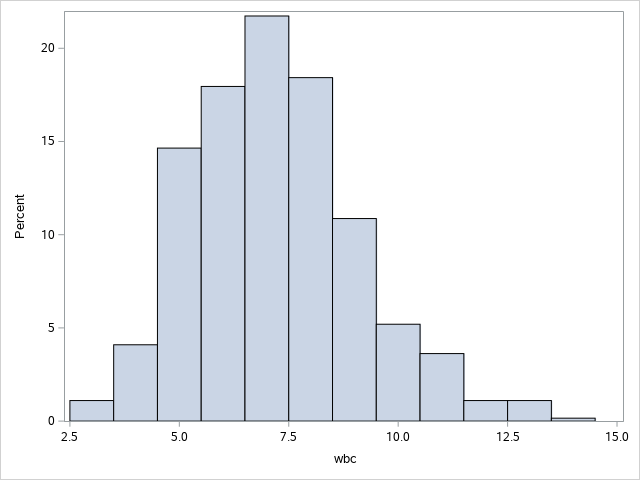

In [21]:
PROC SGPLOT data = phc6089.hem2;
    HISTOGRAM wbc;
RUN;

The procedure PROC SGPLOT has the general form  

```    
PROC SGPLOT data = data-set;
    PLOT_KEYWORD variables / plot-options;
RUN;
```

where `PLOT_KEYWORD` is the SAS statement for the type of plot you would like to create, _variables_ are the variable(s) from _data-set_ that are in the plot, and _plot-options_ are optional additional parameters to modify the plot.  
To make a boxplot, we would simply use the keyword **HBOX** for a horizontal boxplot or **VBOX** to make a vertical boxplot.  



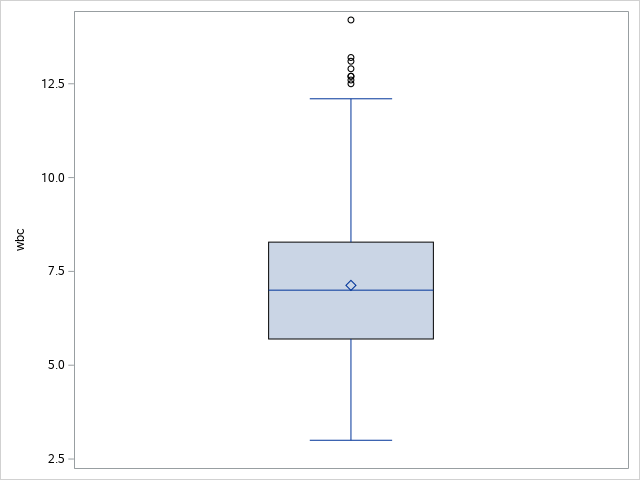

In [22]:
PROC SGPLOT data = phc6089.hem2;
    VBOX wbc;
RUN;

A scatterplot can be created by using the keyword **SCATTER**. This plot requires two variables, so we have the specify **X=** and **Y=** instead of a single variable as we did for HISTOGRAM and VBOX/HBOX.  


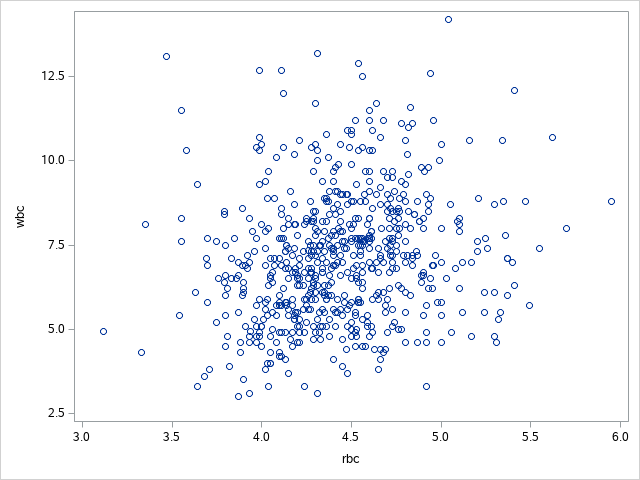

In [23]:
PROC SGPLOT data = phc6089.hem2;
    SCATTER X=rbc Y=wbc;
RUN;

Other standard plots for quantitative variables that are available in PROC SGPLOT include: 

* DENSITY - create a density plot
* SERIES - create a line plot
* BUBBLE - create a bubble plot. This is a scatterplot where the size of the point in a scatterplot is determined by some other third variable.

### Example
A great example of being in a situation in which you need to create a summarized data set is when you want to create an interaction plot. The following program uses data from the ICDB Background data set to illustrate how to create a simple plot to depict whether an interaction exists between two class variables, `sex` and `race`, where we recode race to be white and non-white, when the analysis variable of interest is education level (`ed_level`):  

Obs,sex,race2,_TYPE_,_FREQ_,mn_edlev
1,1,0,0,51,3.47059
2,1,1,0,5,4.40000
3,2,0,0,542,3.70849
4,2,1,0,40,3.42500

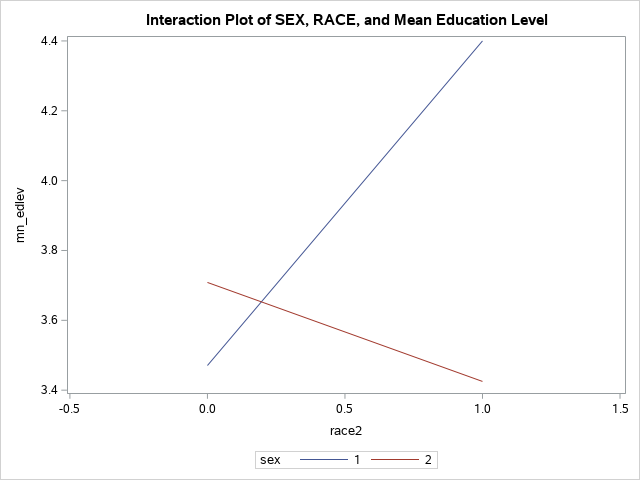

In [28]:
DATA back;
    SET phc6089.back;
    IF race = 4 THEN race2 = 0;
    ELSE race2 = 1;
RUN;

PROC SORT data=back out=back;
  by sex race2;
RUN;
 
PROC MEANS data=back noprint;
   by sex race2;
   var ed_level;
   output out=meaned mean=mn_edlev;
RUN;
 
PROC PRINT data = meaned;
   title 'Mean Education Level for Sex and Race combinations';
RUN;
 
PROC SGPLOT data=meaned;
   title 'Interaction Plot of SEX, RACE, and Mean Education Level';
   SERIES X = race2 Y = mn_edlev / group = sex;
   XAXIS MIN = -0.5 MAX = 1.5;
RUN;

title ; *reset title;

The first DATA step adds a new version of the race variable to collapse all non-white races into a single group due to the low sample size of non-white participants. The SORT procedure prepares the Background dataset for BY-group processing. The MEANS procedure calculates the mean education level ("var ed_level") for each sex race combination ("by sex race"). The OUTPUT statement tells SAS to dump the results into a new dataset called meaned. The PRINT procedure of course tells SAS to print the meaned dataset which is shown above.  
As we'd expect, the dataset contains one row for each sex and race combination. The primary variable is mn_edlev, the average education level of the subjects of that sex and race combination. Onse the meaned datset is created, all we need to do is use the means in teh dataset to create the interaction plot. The SGPLOT procedure tells SAS to plot the mean education level on the y-axis and race on the x-axis. The "group=sex" option of the SERIES statement tells SAS to create two different series plots, one for each gender group. This plots shows that for males (sex=1), the average education level for non-whites is higher than for whites, whereas for females (sex=2), the average education level is lower for non-whites than whites. Note, however, there is a very low sample size for non-whites among both sexes, so this gap in average education level between males and females for non-whites may very well disappear with more data.  
An alternative way to view this type of interaction is with side by side boxplots as the following code illustrates.  


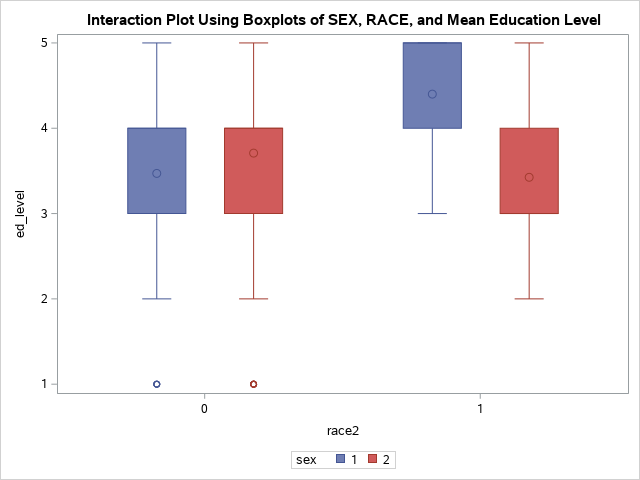

In [31]:
PROC SGPLOT data=back;
   title 'Interaction Plot Using Boxplots of SEX, RACE, and Mean Education Level';
   VBOX ed_level / category = race2 group = sex;
   XAXIS MIN = -0.5 MAX = 1.5;
RUN;

title ; *reset title;

With boxplots, we also have a view of the variability in the data, showing that there is lots of overlap between groups. Any differences in the means are most likely not statistically significant.  
In the VBOX statement, we used the "category = race2" option to create side-by-side boxplots and then used the "group=sex" option to get a boxplot for each gender for both the white and non-white groups.  

### The UNIVARIATE Procedure

In this section, we take a brief look at the UNIVARIATE procedure just so we can see how its output differs from that of the MEANS and SUMMARY procedures.

### Example

The following UNIVARIATE procedure illustrates the (almost) simplest version of the procedure, in which it tells SAS to perform a univariate analysis on the red blood cell count (`rbc`) variable in the phc6089.hem2 data set:  

In [32]:
PROC UNIVARIATE data = phc6089.hem2;
   title 'Univariate Analysis of RBC';
   var rbc;
RUN;

The simplest version of the UNIVARIATE procedure would be one in which no VAR statement is present. Then, SAS would perform a univariate analysis for each numeric variable in the data set. The DATA= option merely tells SAS on which data set you want to do a univariate analysis. As always, if the DATA= option is absent, SAS performs the analysis on the current data set. The VAR statement tells SAS to perform a univariate analysis on the variable `rbc`.  
Launch and run the program and review the output to familiarize yourself with the kinds of summary statistics the univariate procedure calculates. You should see five major sections in the output with the following headings: **Moments** , **Basic Statistical Measures** , **Tests for Location Mu0 = 0** , **Quantiles** , and **Extreme Observations**. These sections are presented in the output shown above.  
With an introductory statistics course in your background, the output should be mostly self-explanatory. For example, the output tells us that the average ("Mean") red blood cell count of the 635 subjects ("N") in the data set is 4.435 with a standard deviation of 0.394. The median ("50% Median") red blood cell count is 4.41. The smallest red blood cell count in the data set is 3.12 (observation #218), while the largest is 5.95 (observation #465).  

### Example
When you specify the NORMAL option, SAS will compute four different test statistics for the null hypothesis that the values of the variable specified in the VAR statement are a random sample from a normal distribution. The four test statistics calculated and presented in the output are: **Shapiro-Wilk** , **Kolmogorov-Smirnov** , **Cramer-von Mises** , and **Anderson-Darling**.  
When you specify the PLOT option, SAS will produce a histogram, a box plot, and a normal probability plot for each variable specified in the VAR statement.  
If you have a BY statement specified as well, SAS will produce each of these plots for each level of the BY statement.  
The following UNIVARIATE procedure illustrates the NORMAL and PLOT options on the variable rbc of the hematology data set:  


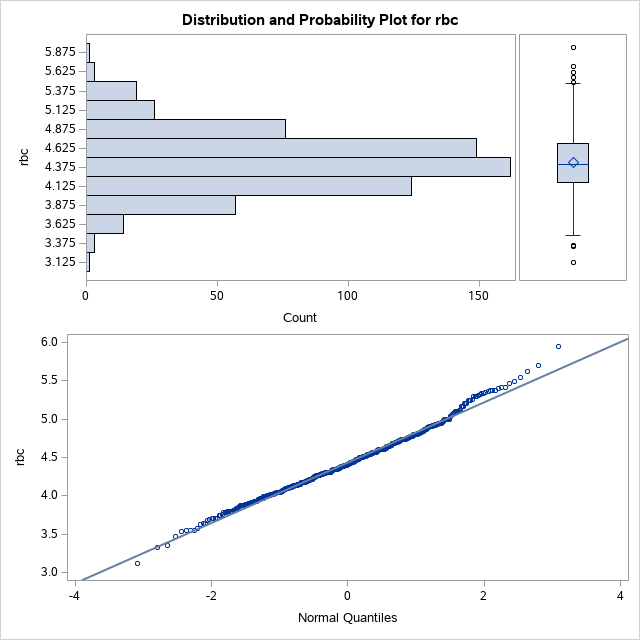

In [33]:
PROC UNIVARIATE data = phc6089.hem2 NORMAL PLOT;
   title 'Univariate Analysis of RBC with NORMAL and PLOT Options';
   var rbc;
RUN;

Launch and run the SAS program. Review the output to familiarize yourself with the change in the UNIVARIATE output that arises from the NORMAL and PLOT options. You should see a new section called **Tests for Normality** that contains the four "test for normality" test statistics and corresponding P-values. At the end of the output, you should see the histogram and box plot  

### Example

When you use the UNIVARIATE procedure's ID statement, SAS uses the values of the variable specified in the ID statement to indicate the five largest and five smallest observations rather than the (usually meaningless) observation number. The following UNIVARIATE procedure uses the subject number (`subj`) to indicate extreme values of red blood cell count (`rbc`):  

In [34]:
PROC UNIVARIATE data = phc6089.hem2;
   title 'Univariate Analysis of RBC with ID Option';
   var rbc;
   id subj;
RUN;

Launch and run the SAS program. Review the output to familiarize yourself with the change in the UNIVARIATE output that arises from using the ID statement. In a previous example, the UNIVARIATE output indicated that observation #218 has the smallest red blood cell count in the data set (3.12), while observation #465 has the largest (5.95). Now, because of the use of the subject number as an ID variable ("id subj"). SAS reports the more helpful information that subject 220007 has the smallest red blood cell count, while subject 420074 has the largest.  
You shouldn't be surprised to learn that the UNIVARIATE procedure can do much more than what we can address now. Just as the BY statement can be used in the MEANS and SUMMARY procedures to categorize the observations in the input data set into subgroups, so can a BY statement be used in the UNIVARIATE procedure. And, just as an OUTPUT statement can be used in the MEANS and SUMMARY procedures to create summarized data sets, so can an OUTPUT statement be used in the UNIVARIATE procedure. For more information about the functionality and syntax of the UNIVARIATE procedure, see the SAS Help and Documentation.  

## Summarizing Categorical Data

In this section, we'll investigate the FREQ procedure as a tool for summarizing and analyzing categorical data. The procedure is a descriptive procedure, as well as a statistical procedure. It allows you to produce one-way to n-way frequency and cross tabulation tables. For two-way tables, the FREQ procedure also computes chi-square tests and measures of association. And, for n-way tables, the FREQ procedure also performs stratified analyses, computing statistics within as well as across strata. The FREQ procedure can also be used to output summary statistics, such as counts and percentages, to a SAS data set.

### A Basic One-Way Table

By default, the FREQ procedure creates a one-way table that contains the **frequency**, **percent**, **cumulative frequency**, and **cumulative percent** of every value of every variable in the input data set. That every there is italicized with good reason ... the FREQ procedure doesn't care whether the variable is a character variable or a numeric variable. And, if a variable is numeric, the FREQ procedure doesn't care if it is a discrete numeric variable with just a few possible outcomes (number of siblings, say) or a continuous numeric variable with an infinite number of possible outcomes (weight, say). That means then if you rely on the default version of the FREQ procedure, it is possible to create lots and lots and lots of output. That's why we'll skip the default version and will jump right to the more practical version in which you restrict the number of tables SAS creates by using a TABLES statement.

The FREQ procedure takes the following generic form:

In [ ]:
PROC FREQ options;
    tables ... /options;
RUN;

The TABLES statement tells SAS the specific frequency table(s) that you want to create. If you don't include a TABLES statement, then SAS creates a one-way frequency table for every variable in your input data set.

As you can see, there are two types of options, namely procedure options and table options. Procedure options, such as the typical "DATA=" option, must follow the PROC FREQ statement. Table options must be specified after a forward slash (/) in the TABLES statement. In either case, you can specify as many options as you would like.

Throughout this lesson, we'll use the ICDB background data set to illustrate the FREQ procedure. Be sure to save the data set to a convenient location on your computer.

### Example

The following FREQ procedure illustrates the simplest practical example, namely a one-way frequency table of the variable sex, with no bells or whistles added:  

In [35]:
LIBNAME phc6089 '/folders/myfolders/SAS_Notes/data/';
 
PROC FREQ data=phc6089.back;
   title 'Frequency Count of SEX';
   tables sex;
RUN;

sex,Frequency,Percent,CumulativeFrequency,CumulativePercent
1,56,8.78,56,8.78
2,582,91.22,638,100.00


Launch the SAS program and edit the LIBNAME statement so that it reflects the location in which you saved the background data set. Then, run the program and review the output. You should see something along the lines of this basic one-way frequency table, in which, as promised, SAS reports the frequency, percent, cumulative frequency, and cumulative percent of each value of the sex variable.  
This output tells us, for example, that 56 or 8.78% of the subjects in the ICDB Study are male (coded as `sex = 1`).  

### Example

Again, by default, SAS outputs frequency counts, percents, cumulative frequencies, and cumulative percents. The NOCUM table option suppresses the printing of the cumulative frequencies and cumulative percentages for one-way frequency tables. The following SAS code illustrates the NOCUM table option:  

In [36]:
PROC FREQ data=phc6089.back;
    title 'Frequency Count of SEX: No Cumulative Stats';
    tables sex / nocum;
RUN;

sex,Frequency,Percent
1,56,8.78
2,582,91.22


Launch and run the SAS program. Review the output to convince yourself that indeed the cumulative frequencies and cumulative percentages are not printed in the table. The table contains only the number and percentage of each `sex`.  
In any FREQ procedure, you can specify many variables in a TABLES statement. If the list is long, you may be able to use a shortcut to specify the list of variables. If you specify a TABLES statement using a numbered range of variables, such as:  

```    
tables var1-var4;
```

then SAS will create a one-way frequency table for the four variables named var1, var2, var3, and var4. If instead in your TABLES statement, you specify a range of variables by their position in the data set, such as:  

``` 
tables sex--race;
```

then SAS will create a one-way frequency table for every variable that appears between the `sex` and `race` variables in the data set, namely in the case of the background data set, `sex`, `state`, `country`, and `race`. Recall that if you're not sure of the position of the variables in your data set, you can use the VARNUM option of the CONTENTS procedure to determine the position of the variables in a data set. (Incidentally, that is not a typo in the second TABLES statement ... it takes two dashes to specify a range of variables by their position in the data set.)  
Rather than specifying many variables in a TABLES statement, you can specify many TABLES statements in a FREQ procedure. However you tell SAS to make multiple tables, you can use the PAGE option to tell SAS to print only one table per page. Otherwise, the FREQ procedure prints multiple tables per page as space permits.  

### Example

The following SAS program illustrates the creation of two one-way frequency tables in conjunction with the PAGE option:  

In [37]:
PROC FREQ data=phc6089.back page;
   title 'Frequency Count of SEX and RACE';
   tables sex race;
RUN;

sex,Frequency,Percent,CumulativeFrequency,CumulativePercent
1,56,8.78,56,8.78
2,582,91.22,638,100.00
race,Frequency,Percent,CumulativeFrequency,CumulativePercent
1,2,0.31,2,0.31
2,7,1.10,9,1.41
3,29,4.55,38,5.96
4,593,92.95,631,98.90
5,3,0.47,634,99.37
6,2,0.31,636,99.69
7,1,0.16,637,99.84


Launch and run the SAS program. Review the output to convince yourself that indeed SAS creates two one-way frequency tables — one for the categorical variable sex and the other for the categorical variable race. Because the PAGE option was invoked, each table should be printed on a separate page. The first page should contain the frequency table for the sex variable, and the second page should contain the frequency table for the race variable  
Incidentally, you might also want to notice that, not surprisingly, the order in which the variables appear in the TABLES statement determines the order in which they appear in the output.  

### Example

As is the case for many SAS procedures, you can use a BY statement to tell SAS to perform an operation for each level of a BY group. The following program tells SAS to create a one-way frequency table for the variable ed_level for each level of the variable sex:  

In [38]:
PROC SORT data=phc6089.back out=s_back;
   by sex;
RUN;
    
PROC FREQ data=s_back;
    title 'Frequency Count of Education Level within Each Level of Sex';
    tables ed_level;
    by sex;
RUN;

ed_level,Frequency,Percent,CumulativeFrequency,CumulativePercent
1,4,7.14,4,7.14
2,7,12.50,11,19.64
3,12,21.43,23,41.07
4,20,35.71,43,76.79
5,13,23.21,56,100.00
ed_level,Frequency,Percent,CumulativeFrequency,CumulativePercent
1,7,1.20,7,1.20
2,22,3.78,29,4.98
3,220,37.80,249,42.78
4,229,39.35,478,82.13


As is always the case, the SORT procedure merely prepares the background data set for BY-group processing. The SORT procedure tells SAS to sort the phc6089.back data set by sex, and to store the results in a new data set called s_back. Then, as you can see, the FREQ procedure is invoked with a BY statement ("by sex") in addition to the TABLES statement ("tables ed_level"). Launch and run the SAS program. Review the output to convince yourself that SAS creates two one-way frequency tables of education level (ed_level) — one for males (sex = 1) and one for females (sex = 2).  
So far, in each of the examples we have looked at, no missing values existed. When they do exist, SAS by default excludes them from your requested frequency tables. Instead, SAS prints the " **Frequency Missing** " below each table. You can instead opt to use the MISSING tables option, in which you tell SAS to instead treat missing values as nonmissing values, and to therefore include them in the calculation of percentages and other statistics. Or you can opt to use the MISSPRINT option to tell SAS to treat missing values as nonmissing values when printing the frequencies but do not include them in the calculation of the statistics.  

### Example

The following SAS program illustrates the MISSING and MISSPRINT options on the variable state in the background data set.  

In [41]:
PROC FREQ data=phc6089.back;
   title 'One-way Table of State: with MISSING Option';
   tables state / missing;
   WHERE state <= 5; *To keep the output small;
RUN;

state,Frequency,Percent,CumulativeFrequency,CumulativePercent
.,42,43.30,42,43.30
1,4,4.12,46,47.42
3,1,1.03,47,48.45
4,5,5.15,52,53.61
5,45,46.39,97,100.00


Launch and run the SAS program, and review the resulting output. The output from the FREQ procedure with the MISSING tables option should look the table shown above. As you can see, the first row tells us that 42 subjects did not report the state in which they live. Because the MISSING option was used, SAS also tells us the 42 subjects comprise 6.58% of the subjects in the data set. SAS also includes the 42 subjects in the calculation of the cumulative percentage.  
On the other hand, the first few rows of output from the FREQ procedure with the MISSPRINT tables option should look something like this.  

In [42]:
PROC FREQ data=phc6089.back;
   title 'One-way Table of State: with MISSPRINT Option';
   tables state/missprint;
   WHERE state <= 5; *to keep the output small;
RUN;

As you can see, the first row again tells us that 42 subjects did not report the state in which they live. In this case, however, because the MISSPRINT option was specified, SAS stops there. That is, SAS does not include the subjects in any of its calculations of the percent, cumulative frequency or cumulative percent.  

### Two-way and N-way Tables

So far, we have only used the FREQ procedure to create one-way frequency tables. However, it is often helpful to create crosstabulation tables in which the frequencies are determined for more than one variable at a time. For example, if we were interested in the percentage of individuals that experience side effects on our new treatment and how this differs between different age groups, then we would need to create a two-way contigency table between the two categorical variables age group (say with the values 18-29, 30-44, 45-54, 55-70, and more than 70) and side effects (yes or no). We'll investigate such tables in this section.

### Example

The following FREQ procedure illustrates the simplest example of telling SAS to create a two-way table, for the variables `sex` and `ed_level`, with no bells and whistles added.  

In [43]:
PROC FREQ data=phc6089.back;
   title 'Crosstabulation of Education Level and Sex';
   tables ed_level*sex;
RUN;

As you can see, to tell SAS to create a two-way table of `ed_level` and `sex`, we merely use an asterisk (*) to join the two variables in the TABLES statement.  
Launch and run the SAS program. Review the output to convince yourself that SAS created the requested two-way table. In general, the values of the variable appearing before the asterisk form the rows of the table, and the values of the variable appearing after the asterisk form the columns of the table. In this case, since `ed_level` appears before the asterisk in the TABLES statement, its values form the rows of the table. And, since `sex` appears after the asterisk, its values form the columns of the table.  
When SAS creates two-way tables, each cell of the table contains, by default, the cell frequency, the cell percentage of the total frequency, the cell percentage of the row frequency, and the cell percentage of the column frequency. You might want to review the numbers in each of the cells of the table to make sure you understand what is what. In the upper left-hand corner of the table, SAS always prints a guide to the numbers appearing in each of the cells in the table. Here, SAS tells us that the first number in cell (i,j) is the number of subjects of `ed_level i` and `sex j`; the second number in cell (i,j) is the percentage of subjects of `ed_level i` and `sex j`; the third number in cell (i,j) is the percentage of subjects who are `sex j` given that they are `ed_level i`; and the fourth number in cell (i,j) is the percentage of subjects who are `ed_level i` given that they are `sex j`. For example, for the cell in which `ed_level = 4` and `sex = 2`, SAS tells us that: 229 of the subjects in the data set are ed_level 4 and sex 2; 35.89% of the subjects in the data set are `ed_level` 4 and `sex` 2; 91.97% of the subjects in the data set who are `ed_level` 4 are `sex` 2; and 39.35% of the subjects in the data set who are `sex` 2 are `ed_level` 4.  
**A little note about shortcuts.** If you have many different two-way tables to create, you can use a variety of shortcuts. For example, the TABLES statement:  

```    
tables a*(b c);
```

tells SAS to create a two-way table between variables a and b (a * b) and a two-way table between variables `a` and `c` (a * c). The TABLES statement:  

``` 
tables (a b)*(c d);
```

tells SAS to create four two-way tables, namely: a * c, b * c, a * d, and b * d. The TABLES statement:  
    

```
tables (a b c)*d;
```

tells SAS to create three two-way tables, namely: a * d, b * d, and c * d.  

### Example

For a frequency analysis of more than two variables, we can use the FREQ procedure to create n-way crosstabulation tables. In that case, a series of two-way tables is created, with a table for each level of the other variable(s). The following program creates a three-way table of `sex`, `job_chng`, and `ed_level`:  

In [44]:
PROC FREQ data=phc6089.back;
   title '3-way Table of Sex, Job Change, and Ed. Level';
   tables sex*job_chng*ed_level;
RUN;

As you can see, to tell SAS to create a three-way table of sex, job_chng, and ed_level, we use an asterisk (*) to join the three variables in the TABLES statement. The order of the variables is important. In n-way tables, the last two variables of the TABLES statement become the rows and columns of the two-way tables. Variables that precede the last two variables in the TABLES statement stratify the crosstabulation tables. So, in this case, we should expect SAS to create two two-way tables of `job_chng` and `ed_level`, one for when `sex = 1` and one for when `sex = 2`.  
Launch and run the SAS program, and review the output to convince yourself that SAS created the three-way table as described. You should see that, indeed, SAS created one two-way table of `job_chng` and `ed_level` for when `sex = 1`, and one two-way table of `job_chng` and `ed_level` for when `sex = 2`.  
It probably goes without saying that, in general, n-way tables can generate lots of output.  

### Cell Statistics

As you now know, when SAS creates two-way tables, each cell of the table contains, by default, the cell frequency, the (joint) cell percentage, the conditional row percentage, and the conditional column percentage. As usual, you don't have to accept the default ... you can tell SAS to suppress some of the default statistics it displays ... or you can tell SAS to display alternative statistics.

For n-way crosstabulations, you can suppress the default output in each of the cells by using any (or all) of the following table options:

* **NOFREQ** suppresses the printing of the cell freqencies
* **NOROW** suppresses the printing of the row percentages
* **NOCOL** suppresses the printing of the column percentages, and
* **NOPERCENT** suppresses the printing of the (joint) cell percentages.

### Example

The following SAS program illustrates the NOROW, NOCOL, and NOPERCENT table options:  

In [45]:
PROC FREQ data=phc6089.back;
   title 'Crosstabulation of SEX and RACE: No percents';
   tables race*sex / norow nocol nopercent;
RUN;

Launch and run the SAS program. Review the output to convince yourself that SAS did indeed suppress the default row percentages, column percentages, and cell percentages. Note, too, that SAS changed the guide in the upper left-hand corner of the table to reflect the new situation — the guide now tells us that the lone number reported in each cell is the cell frequency.  
Instead of suppressing output in an n-way table, we can request additional output in each of the cells by using the following options:  
* EXPECTED, to print the expected cell frequencies under the null hypothesis of independence
* DEVIATION, to print the deviation of the cell frequency from the expected cell frequency (under the null hypothesis of independence)
* CELLCHI2, to print each cell's contribution to the total chi-squared statistic

That is, CELLCHI2 is defined as: CELLCHI2 = (frequency - expected)2⁄expected.  

### Example

In creating the two-way table between race and sex, the following FREQ procedure requests that the EXPECTED and CELLCHI2 statistics be printed, while at the same time suppressing the printing of the joint, row, and column percentages:  

In [47]:
PROC FREQ data=phc6089.back;
  title 'Crosstabulation of SEX and RACE: With Expecteds';
  tables race*sex / expected cellchi2 norow nocol nopercent;
RUN;

Launch and run the SAS program. Review the output to convince yourself that SAS did indeed suppress the printing of the joint, row, and column percentages, while adding the expected cell frequencies, as well as the cell's contribution to the chi-square statistic, to the cell output. Note, again, that SAS changed the guide in the upper left-hand corner of the table to reflect the new situation — the guide now tells us that the second number in each cell is the expected cell frequency and the third number is the cell's contribution to the chi-square statistic.  

### Changing the Table Format

When three or more variables are specified, the multiple levels of n-way tables can produce lots of output. Such bulky and complex crosstabulations are often easier to read as a continuous list. To tell SAS to generate list output for crosstabulations rather than the default tables, simply use the LIST tables option.

### Example

The following FREQ procedure illustrates the LIST option:  

In [49]:
PROC FREQ data=phc6089.back;
   title 'Crosstabulation of SEX and RACE: In List Format';
   tables sex*race/list;
RUN;

sex,race,Frequency,Percent,CumulativeFrequency,CumulativePercent
1,2,3,0.47,3,0.47
1,3,1,0.16,4,0.63
1,4,51,7.99,55,8.62
1,7,1,0.16,56,8.78
2,1,2,0.31,58,9.09
2,2,4,0.63,62,9.72
2,3,28,4.39,90,14.11
2,4,542,84.95,632,99.06
2,5,3,0.47,635,99.53
2,6,2,0.31,637,99.84


Launch and run the SAS program. Review the output to convince yourself that rather than creating a two-way table, SAS prints the requested two-way table as a list. I tend to prefer the LIST format for such cross-tabulations, as long as I'm not in need of the (conditional) row and column percentages (which, as you can see, are not reported in LIST format).
Incidentally, the LIST option cannot be used when the TABLES statement requests statistical tests or measures of association to be included in the output. (We'll be discussing such tests and measures later in this lesson.) Also, expected cell frequencies are not printed when the LIST option is specified, even if the EXPECTED option is invoked.
An alternative to the LIST option is the CROSSLIST table option. When you add the CROSSLIST option to your TABLES statement, SAS displays crosstabulation tables in the standard Output Delivery System (ODS) column format. The benefit of doing so probably won't make much sense until we learn about ODS later. The option creates a table that has a table definition that you can customize by using the TEMPLATE procedure. For now, let's just be satisfied with looking at an example to see what the output looks like when you use the CROSSLIST option.

### Example

The following FREQ procedure illustrates the CROSSLIST option:  

In [50]:
PROC FREQ data=phc6089.back;
   title 'Crosstabulation of SEX and RACE: In Crosslist Format';
   tables sex*race/crosslist;
RUN;

Launch and run the SAS program, and review the output to familiarize yourself with the appearance of the output when you use the CROSSLIST option.

### Creating Output Datasets

Just as the UNIVARIATE, MEANS and SUMMARY procedures can be used to create new SAS data sets containing summary statistics of numeric variables, the FREQ procedure can be used to create new SAS data sets containing summary statistics of categorical variables. This can be a very useful tool when manipulating and subsequently analyzing data.

### Example

The following FREQ procedure tells SAS to create an output data set which contains the counts and percentages for each combination of the variables `sex` and `race`:  

In [52]:
PROC FREQ data=phc6089.back;
   tables sex*race / out = sexfreq noprint;
RUN;
 
PROC PRINT data = sexfreq;
   title 'Output Dataset: SEXFREQ';
RUN;

Obs,sex,race,COUNT,PERCENT
1,1,2,3,0.4702
2,1,3,1,0.1567
3,1,4,51,7.9937
4,1,7,1,0.1567
5,2,1,2,0.3135
6,2,2,4,0.6270
7,2,3,28,4.3887
8,2,4,542,84.9530
9,2,5,3,0.4702
10,2,6,2,0.3135


The NOPRINT tables option tells SAS to suppress printing the two-way crosstabulation of `sex*race`. Instead, the results are dumped to the temporary data set `sexfreq` that is specified in the OUT= tables option. The data set in the OUT= option becomes the current data set. Therefore, since the PRINT procedure does not have a DATA= option to tell SAS the name of the data set to print, SAS prints the current data set, namely `sexfreq`.  
Launch and run the SAS program. Review the output to convince yourself that the sexfreq data set contains one record for each combination of sex and race that occurs in the data set. And, note that the data set contains four variables, `sex`, `race`, `COUNT` (whose value is the number of subjects in the data set of that sex and race), and `PERCENT` (whose value is the percentage of subjects in the data set of that sex and race).  

### Example

The SPARSE tables option tells SAS to print information about all possible combinations of levels of the variables in the table request, even when some combinations of levels do not occur in the data. **This option affects printouts under the LIST option and output data sets only**. The following SAS code illustrates use of the SPARSE option in the creation of an output data set called `sexfreq`:  

In [53]:
PROC FREQ data=phc6089.back;
    tables sex*race / out = sexfreq noprint sparse;
RUN;
 
PROC PRINT data = sexfreq;
    title 'Output Dataset: SEXFREQ with SPARSE option';
RUN;

Obs,sex,race,COUNT,PERCENT
1,1,1,0,0.0000
2,1,2,3,0.4702
3,1,3,1,0.1567
4,1,4,51,7.9937
5,1,5,0,0.0000
6,1,6,0,0.0000
7,1,7,1,0.1567
8,1,8,0,0.0000
9,2,1,2,0.3135
10,2,2,4,0.6270


The only difference between this code and the previous code is the inclusion of the SPARSE option. Launch and run the SAS program. Review the output to convince yourself that the `sexfreq` data set now contains one record for each possible combination of `sex` and `race` regardless of whether or not the combination occurs in the data set. That is, since there are 2 sexes and 8 races, the `sexfreq` data set contains 16 records — one for each of the combinations. For example, there is now a record in the `sexfreq` data set corresponding to sex = 1 and race = 1 even though there are no subjects in the data set of that sex and race combination (`COUNT = 0`).  

## Exercises

For these exercises, we will use the bike lanes dataset ([source](data.baltimorecity.gov/Transportation/Bike-Lanes/xzfj-gyms)), Bike_Lanes.csv. You can download this dataset from the course webpage.

1. How many bike lanes are currently in Baltimore? You can assume that each observation/row is a different bike lane.
2. How many (a) feet and (b) miles of total bike lanes are currently in Baltimore? (The length variable provides the length in feet.)
3. How many types (type) bike lanes are there? Which type (a) occurs the most and (b) has the longest average bike lane length?
4. How many different projects (project) do the bike lanes fall into? Which project category has the longest average bike lane length?
5. What was the average bike lane length per year that they were installed? (Be sure to first set dateInstalled to . if it is equal to zero.)
6. (a) Numerically and (b) graphically describe the distribution of bike lane lengths (length).
7. Describe the distribution of bike lane lengths numerically and graphically after stratifying them by (a) type and then by (b) number of lanes (numLanes).
